# Insert CSV into DataFrame

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip3 install psycopg2-binary

In [3]:
df = pd.read_csv('online_retail_II.csv')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
list(df)

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

# Total Invoice Amount Distribution

In [7]:
amount_df = df.copy()

In [8]:
amount_df['amount'] = amount_df['Quantity'] * amount_df['Price']

In [9]:
amount_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [10]:
total_df = amount_df.copy()

In [11]:
total_df = total_df[['Invoice', 'amount']][total_df.amount > 0].groupby('Invoice').sum('amount')
total_df.head()

,amount
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


Minimum: 0.19
Mean: 523.30
Median: 304.31
Mode: 15.00
Maximum: 168469.60


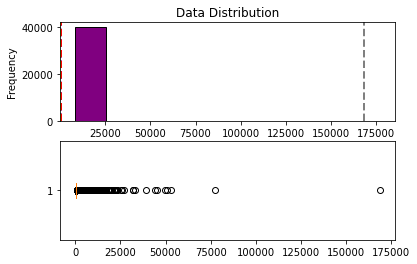

In [83]:
def show_distribution(totalAmount):
    _min = totalAmount.min()
    _max = totalAmount.max()
    _mean = totalAmount.mean()
    _median = totalAmount.median()
    _mode = totalAmount.mode()[0]

    print(f"Minimum: {_min:.2f}")
    print(f"Mean: {_mean:.2f}")
    print(f"Median: {_median:.2f}")
    print(f"Mode: {_mode:.2f}")
    print(f"Maximum: {_max:.2f}")

    plt.subplot(2, 1, 1)
    plt.hist(totalAmount, align='right', color='purple', edgecolor='black')
    plt.ylabel("Frequency")
    plt.title("Data Distribution")
    plt.axvline(x=_min, color="green", linestyle="--", linewidth = 2)
    plt.axvline(x=_mean, color="blue", linestyle="--", linewidth = 2)
    plt.axvline(x=_median, color="red", linestyle="--", linewidth = 2)
    plt.axvline(x=_mode, color="yellow", linestyle="--",linewidth = 2)
    plt.axvline(x=_max, color="cyan", linestyle="--", linewidth = 2)

    plt.subplot(2, 1, 2)
    plt.boxplot(totalAmount, vert=False)

    plt.show()

show_distribution(total_df.amount)  

Minimum: 0.19
Mean: 271.68
Median: 256.24
Mode: 15.00
Maximum: 724.25


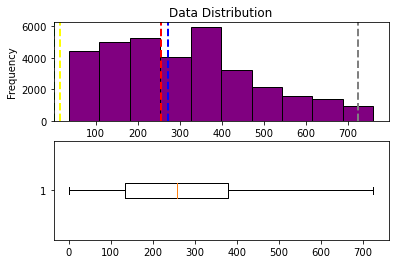

In [84]:
amount = total_df["amount"]
show_distribution(amount[amount.between(amount.quantile(0), amount.quantile(0.85))])

## Monthly Placed and Canceled Orders

In [12]:
orders_df = amount_df.copy()
orders_df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [13]:
orders_df["yyyymm"] = (pd.DatetimeIndex(orders_df["InvoiceDate"]).year * 100 + pd.DatetimeIndex(orders_df["InvoiceDate"]).month).astype(str)
orders_df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,yyyymm
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [79]:
monthlyOrders_df = orders_df.copy()
monthlyOrders_df = monthlyOrders_df.groupby(["yyyymm", "Invoice"]).count().groupby("yyyymm").size().reset_index()
monthlyOrders_df.columns = ['date', 'mOrders']
monthlyOrders_df.head()

,date,mOrders
0,200912,2330
1,201001,1633
2,201002,1969
3,201003,2367
4,201004,1892


In [72]:
canceledOrders_df = orders_df.copy()
canceledOrders_df = canceledOrders_df[canceledOrders_df.Invoice.str.startswith("C")].groupby(["yyyymm", "Invoice"]).count().groupby("yyyymm").size().reset_index()
canceledOrders_df.columns = ['date', 'cOrders']
canceledOrders_df.head()

,date,cOrders
0,200912,401
1,201001,300
2,201002,240
3,201003,407
4,201004,304


In [97]:
diffOrders_df = orders_df.copy()
diffOrders_df = diffOrders_df.groupby(["yyyymm", "Invoice"]).count().groupby("yyyymm").size().reset_index()
diffOrders_df.columns = ['date', 'orders']
diffOrders_df['orders'] = monthlyOrders_df['mOrders'] - 2 * canceledOrders_df['cOrders']
diffOrders_df.head()

,date,orders
0,200912,1528
1,201001,1033
2,201002,1489
3,201003,1553
4,201004,1284


Text(0.5, 0, 'YearMonth')

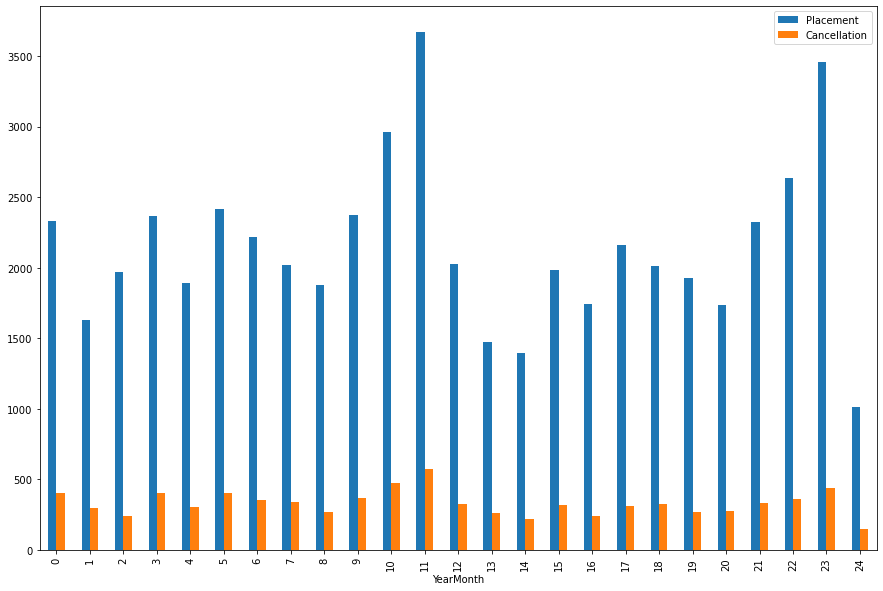

In [159]:
orders = pd.concat([monthlyOrders_df['mOrders'], canceledOrders_df['cOrders']], axis=1)
orders.columns = ['Placement', 'Cancellation']
orders.head()
orders.plot(use_index=True, y=['Placement', 'Cancellation'], kind='bar', figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel("YearMonth")

## Monthly Sales

In [14]:
sales_df = orders_df.copy()
sales_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,yyyymm
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [131]:
monthlySales_df = sales_df.copy()
monthlySales_df = monthlySales_df[['yyyymm','amount']].groupby('yyyymm').sum()/1000000
monthlySales_df.reset_index()
monthlySales_df.columns = ['amount']
monthlySales_df.head()

,amount
yyyymm,
200912,0.799847
201001,0.624033
201002,0.533091
201003,0.765849
201004,0.590580


Text(0, 0.5, 'Sales(Millions)')

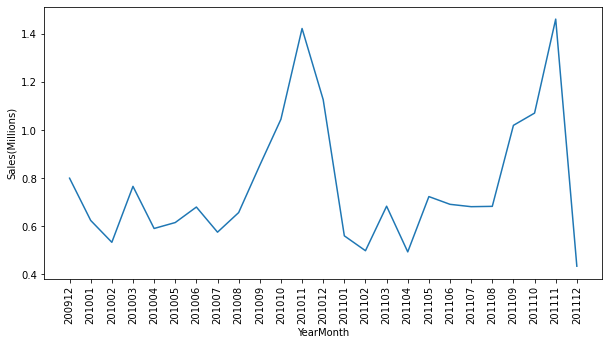

In [136]:
fig = plt.figure(figsize = (10,5))
plt.plot(monthlySales_df["amount"])
plt.xticks(rotation=90)
plt.xlabel("YearMonth")
plt.ylabel("Sales(Millions)")

## Monthly Sales Growth

In [138]:
monthlySalesGrowth_df = monthlySales_df.copy()
monthlySalesGrowth_df = monthlySalesGrowth_df.pct_change()
monthlySalesGrowth_df.head()

,amount
yyyymm,
200912,NaN
201001,-0.219810
201002,-0.145732
201003,0.436618
201004,-0.228855


Text(0, 0.5, 'Growth %')

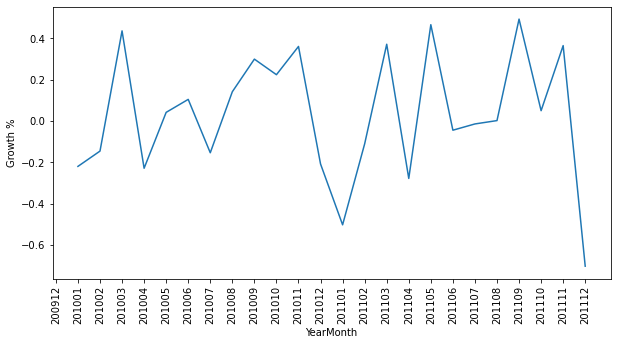

In [139]:
fig = plt.figure(figsize = (10,5))
plt.plot(monthlySalesGrowth_df["amount"])
plt.xticks(rotation=90)
plt.xlabel("YearMonth")
plt.ylabel("Growth %")

## Monthly Active Users

In [16]:
users_df = sales_df.copy()
users_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,yyyymm
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [17]:
activeUsers_df = users_df.groupby('yyyymm')["Customer ID"].nunique()
activeUsers_df.head()

yyyymm
200912    1045
201001     786
201002     807
201003    1111
201004     998
Name: Customer ID, dtype: int64

<AxesSubplot:xlabel='yyyymm', ylabel='# of Active Users'>

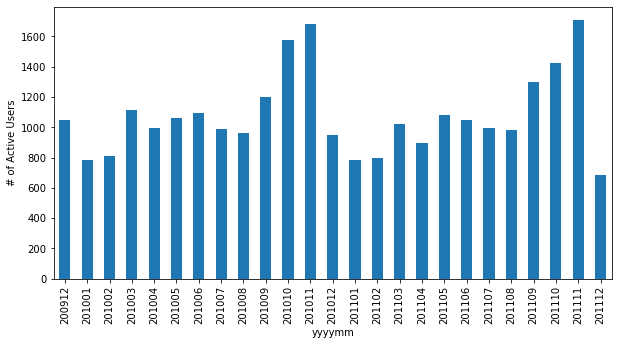

In [140]:
activeUsers_df.plot( kind='bar', figsize=(10,5), ylabel="# of Active Users")

## New and Existing Users

In [53]:
newCustomers_df = sales_df.copy()
newCustomers_df = newCustomers_df.groupby("Customer ID").first().groupby("yyyymm").size().reset_index()
newCustomers_df.columns = ['date', 'newUsers']

newCustomers_df.head()

,date,newUsers
0,200912,1045
1,201001,394
2,201002,363
3,201003,436
4,201004,291


In [60]:
existingCustomers_df = sales_df.copy()
existingCustomers_df = existingCustomers_df.groupby(["yyyymm", "Customer ID"]).size().groupby("yyyymm").size().reset_index()
existingCustomers_df.columns = ['date', 'existingUsers']
existingCustomers_df.head()

,date,existingUsers
0,200912,1045
1,201001,786
2,201002,807
3,201003,1111
4,201004,998


In [65]:
diffCustomers_df = sales_df.copy()
diffCustomers_df = diffCustomers_df.groupby(["yyyymm", "Customer ID"]).size().groupby("yyyymm").size().reset_index()
diffCustomers_df.columns = ["date", "userDiff"]
diffCustomers_df['userDiff'] = existingCustomers_df['existingUsers'] - newCustomers_df['newUsers']
diffCustomers_df.head()

,date,userDiff
0,200912,0
1,201001,392
2,201002,444
3,201003,675
4,201004,707


In [67]:
newExistingUsers_df = pd.merge(newCustomers_df, diffCustomers_df, on="date")
newExistingUsers_df.head()

,date,newUsers,userDiff
0,200912,1045,0
1,201001,394,392
2,201002,363,444
3,201003,436,675
4,201004,291,707


Text(0.5, 1.0, 'New and Existing Customers')

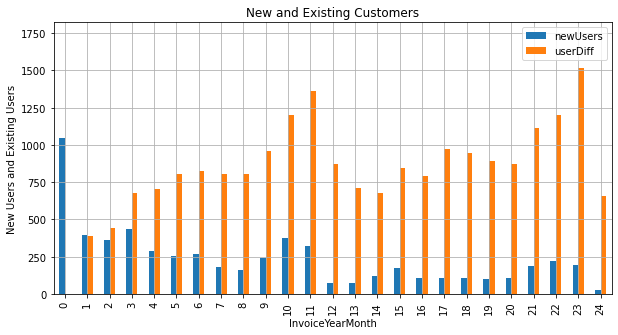

In [142]:
newExistingUsers_df.plot(use_index=True, y=['newUsers', 'userDiff'], kind='bar', figsize=(10,5))
plt.xticks(rotation=90)
plt.margins(0.2)
plt.grid(True)
plt.xlabel("InvoiceYearMonth")
plt.ylabel("New Users and Existing Users")
plt.title("New and Existing Customers")

## Finding RFM

In [98]:
from datetime import datetime

In [99]:
rfm_df = df.copy()
rfm_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [101]:
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])
rfm_df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [104]:
from datetime import timedelta

In [106]:
rfm_df['TotalSum'] = rfm_df['Quantity'] * rfm_df['Price']
snapshot_date = rfm_df['InvoiceDate'].max() + timedelta(days=1)
data_process = rfm_df.groupby(['Customer ID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'Invoice': 'count',
        'TotalSum': 'sum'})
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)
data_process.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,326,48,-64.68
12347.0,2,253,5633.32
12348.0,75,51,2019.40
12349.0,19,180,4404.54
12350.0,310,17,334.40


## RFM Segmentation

In [107]:
r_labels = range(4, 0, -1); f_labels = range(1, 5)
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
Customer ID,,,,,
12346.0,326,48,-64.68,2,2
12347.0,2,253,5633.32,4,4
12348.0,75,51,2019.40,3,2
12349.0,19,180,4404.54,4,4
12350.0,310,17,334.40,2,1


In [108]:
m_labels = range(1, 5)
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
data_process = data_process.assign(M = m_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,326,48,-64.68,2,2,1
12347.0,2,253,5633.32,4,4,4
12348.0,75,51,2019.40,3,2,3
12349.0,19,180,4404.54,4,4,4
12350.0,310,17,334.40,2,1,2


In [111]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segmentation'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segmentation
Customer ID,,,,,,,
12346.0,326,48,-64.68,2,2,1,2.02.01.0
12347.0,2,253,5633.32,4,4,4,4.04.04.0
12348.0,75,51,2019.40,3,2,3,3.02.03.0
12349.0,19,180,4404.54,4,4,4,4.04.04.0
12350.0,310,17,334.40,2,1,2,2.01.02.0
